In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the training data
df = pd.read_csv("exoData/exoTrain.csv")
df

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


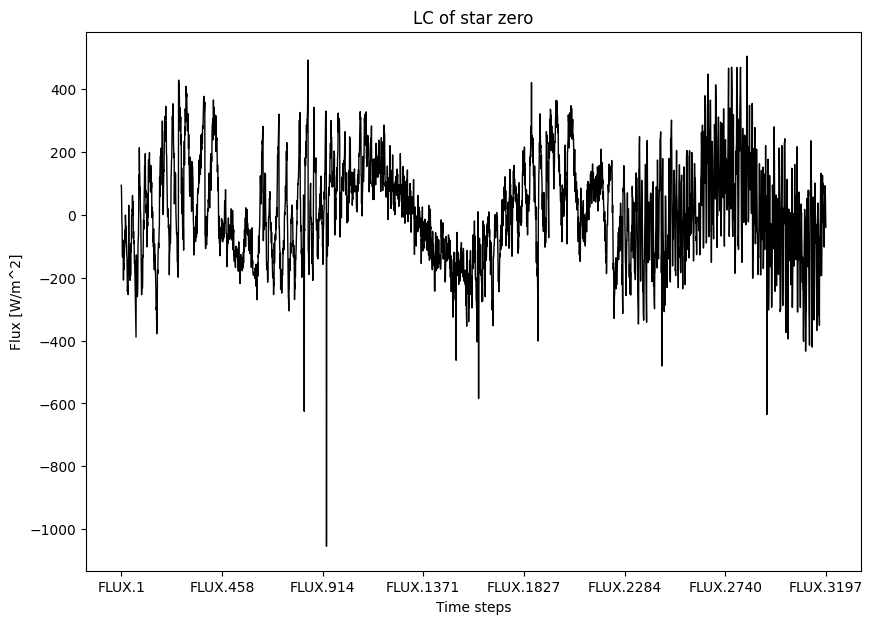

In [3]:
# will pick a star, just take the first one for now, index 0
star_1 = df.iloc[0]

flux_arr = star_1.drop(["LABEL"])
label = star_1["LABEL"]

flux_ticks = np.linspace(0, np.size(flux_arr) - 1, 8)

plt.figure(figsize=(10,7))
plt.plot(flux_arr, linewidth=1, c="black")
plt.xticks(flux_ticks)

plt.title("LC of star zero")
plt.ylabel("Flux [W/m^2]")
plt.xlabel("Time steps")
plt.show()

In [4]:
# make a quick function to plot the light curve of a discrete star
def plot_lc(df, index):
    star = df.iloc[index]

    # create a dictionary based on label:
    #   2 = at least one exoplanet, and hence will appear blue.
    #   1 = no exoplanets in the stars orbit, and the colour will be red
    c_label = {
        2: "blue",
        1: "red"
    }

    flux_arr = star.drop(["LABEL"])
    label = star["LABEL"]

    flux_ticks = np.linspace(0, np.size(flux_arr) - 1, 8)

    plt.figure(figsize=(10,7))
    plt.plot(flux_arr, linewidth=1, c=c_label[label])
    plt.xticks(flux_ticks)

    plt.title(f"Light Curve of star {index}")
    plt.ylabel("Flux [W/m^2]")
    plt.xlabel("Time steps")
    plt.show()

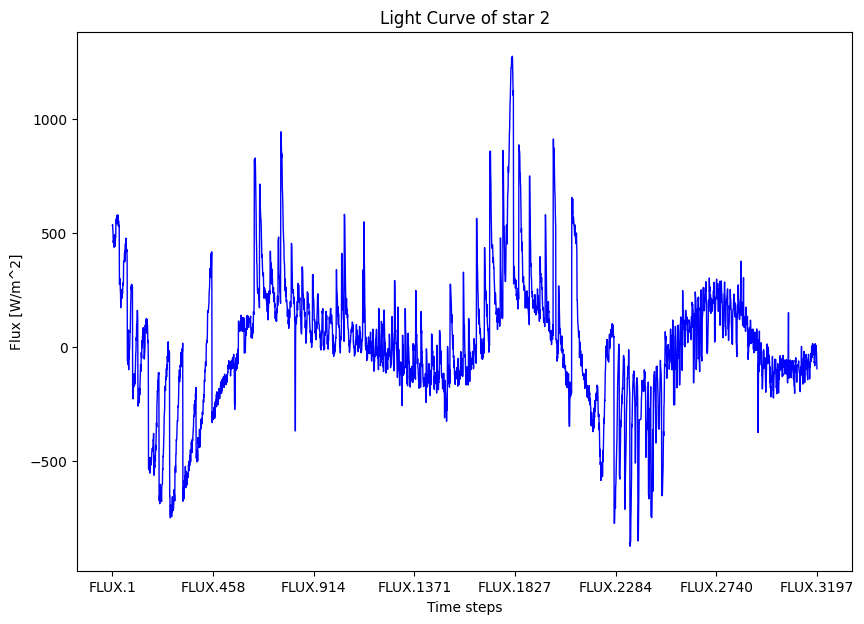

In [5]:
plot_lc(df, 2)  # blue => an exoplanet orbits this star.

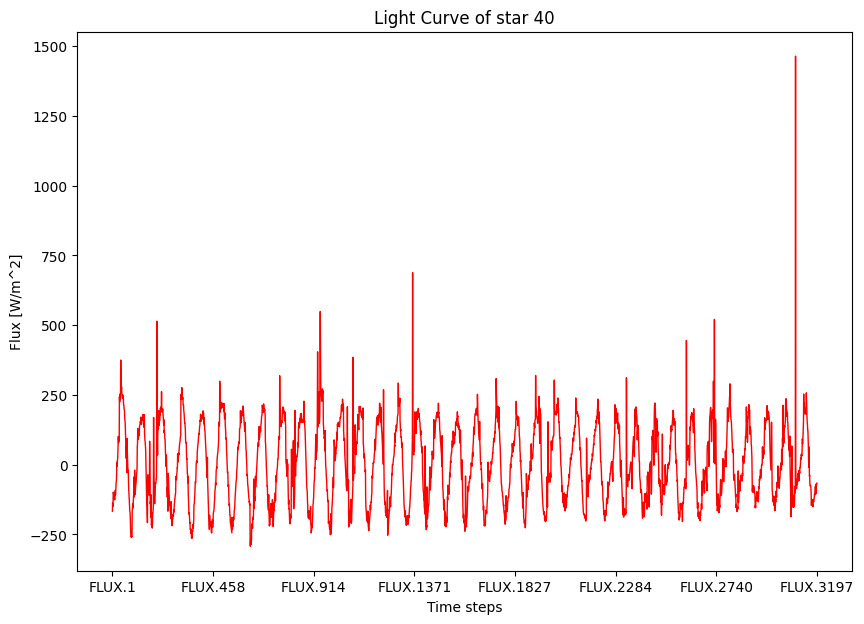

In [6]:
plot_lc(df, 40) # red, an exoplanet does NOT orbit the star.

# Intermittant Summary

So all we are presented with is ~5000 stars and their light-curves, and a truth label of the presence of at least one exoplanet, or no exoplanets in its orbit.

The next step is to try and extract some features from these light curves from what we know about exoplanets, in more of a classical ML approach.

Eventually, deploying an RNN/CNN should suit this data well, being time-series.

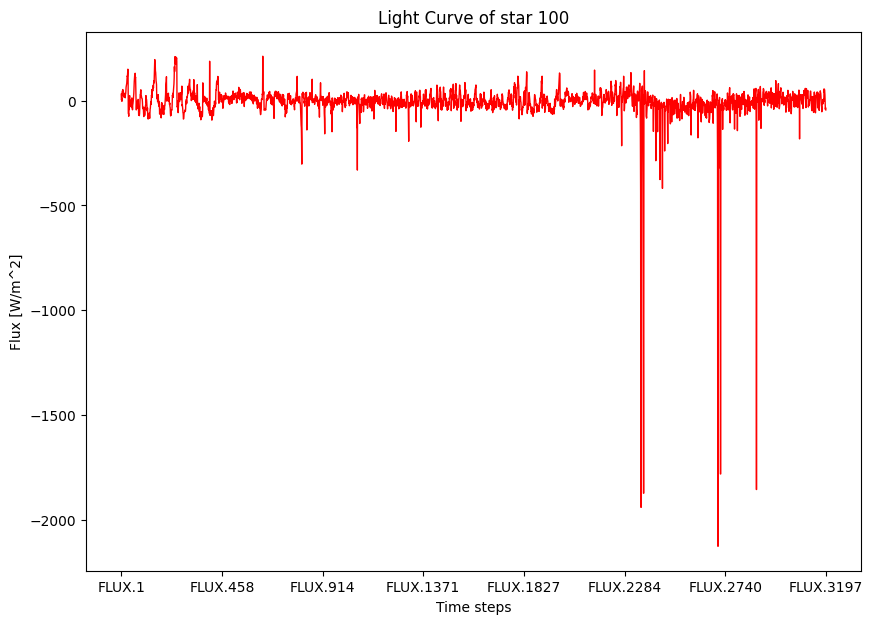

In [7]:
# Another example light curve...
plot_lc(df, 100)

In [8]:
# above is an example that could potentially skew our view, and is worth noting in the future.
# anomalous flux measurements are potentially caused by faulty equipment or obstructed view of the star (dust, turbulant atmosphere etc)

# these spikes could be indicative, so we dont worry about them now, but we highlight the possibility that they can pollute results.

# Issue #1

We are looking for charcteristic dips in the light curve where the exoplanet eclipses the star. But, the light curve of a star is typically periodic anyway? what can we do about that?

In [9]:
# lets do a differential plot of a light curve, i like the look of star #41 for this...

def diff_lc(df, index):
    star = df.iloc[index]

    # create a dictionary based on label:
    #   2 = at least one exoplanet, and hence will appear blue.
    #   1 = no exoplanets in the stars orbit, and the colour will be red
    c_label = {
        2: "blue",
        1: "red"
    }

    flux_arr = star.drop(["LABEL"])
    label = star["LABEL"]

    # find "diff_arr" - the differential array for the diff plot
    diff_arr = flux_arr.iloc[1:].reset_index(drop=True) - flux_arr.iloc[:-1].reset_index(drop=True)

    flux_ticks = np.linspace(0, np.size(diff_arr) - 1, 8)

    plt.figure(figsize=(10,7))
    plt.plot(diff_arr, linewidth=1, c=c_label[label])
    plt.xticks(flux_ticks)

    plt.title(f"Differential Light Curve of star {index}")
    plt.ylabel("Flux [W/m^2 per timestep]")
    plt.xlabel("Time steps")
    plt.show()

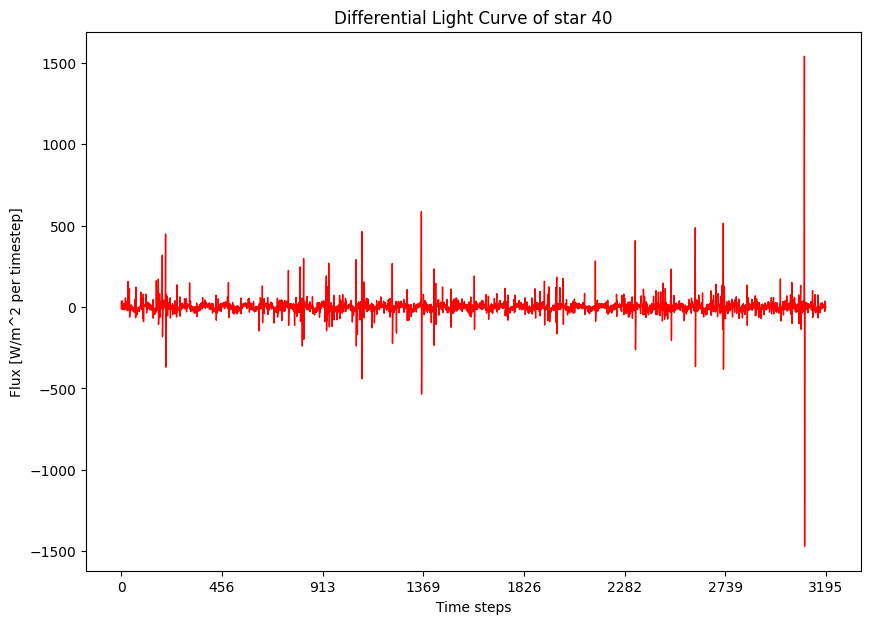

In [10]:
diff_lc(df, 40)

This makes sense, since we are dealing with light-curves that resemble sine waves.

How do you measure local period of a wave?

In [15]:
from astropy.timeseries import LombScargle

# take star 41 since it has a very obvious orbital period

flux_st41 = df.iloc[40].drop(["LABEL"])

time = np.arange(len(flux_st41))
flux = flux_st41.to_numpy()

frequency, power = LombScargle(time, flux).autopower()
best_period = 1 / frequency[np.argmax(power)]

print(best_period)

0.4971920163034178


Now that we have $ P_{41}\approx 0.5 $, we can model the main signal from the star as so:

$ s(t)=A\sin\left({\frac{2\pi t}{P} + \phi}\right) + C $

In [16]:
# import curvefit
from scipy.optimize import curve_fit

# define the model in the code
def sine_41(t, A, phi, C):
    return A * np.sin((2 * np.pi * t)/best_period + phi) + C

# guesses, just for star 41 in this case: [amplitude, phi, y-translation]
I = [0.01, 0, np.mean(flux)]

parameters, _ = curve_fit(sine_41, time, flux, p0=I)

trend = sine_41(time, *parameters)
detrended_flux = flux - trend

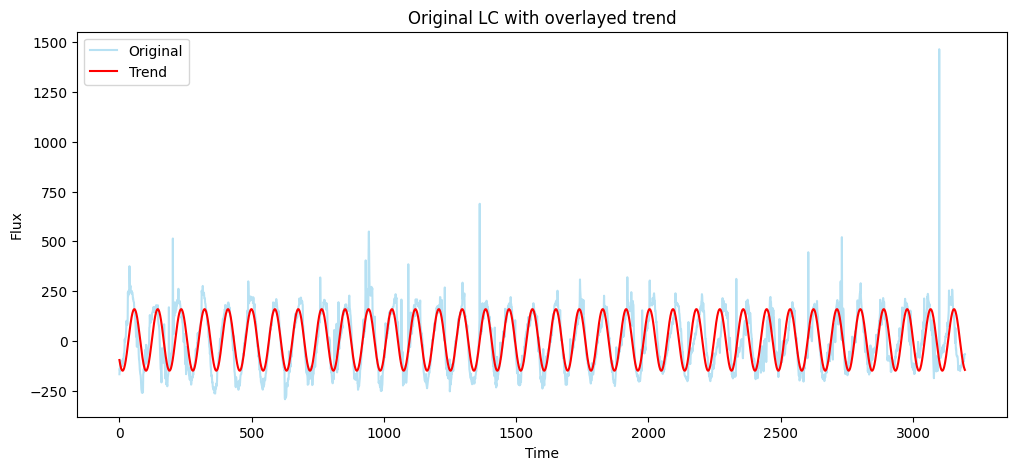

In [17]:
plt.figure(figsize=(12,5))
plt.plot(time, flux, label='Original', c="skyblue", alpha=0.6)
plt.plot(time, trend, label='Trend', c="r")
plt.title("Original LC with overlayed trend")
plt.xlabel("Time")
plt.ylabel("Flux")
plt.legend()
plt.show()

This looks reasonable. Our idea of the "*best_period*" seems good, the red 'trend' wave appears to follow the stars lightcurve well, missing the amplitude in parts, but thats okay.

Some considerations to touch on:

1. This is a single case out of many, and just served as some consistent, periodic data to prove that the trand-finding logic works.
2. ?

Since this is a cherry-picked case, we should write a function that performs this on any star...

In [18]:
# Writing a "wave_trend" function for each event
def wave_trend(df, index):
    #
    # Input: dataframe and index corresponding to a star
    # output: plot a light-curve and "trend" line as we see above
    #

    # get the lc as normal:
    star = df.iloc[index]

    flux_arr = star.drop(["LABEL"])
    label = star["LABEL"]
    flux_ticks = np.linspace(0, np.size(flux_arr) - 1, 8)

    # get the best period
    time = np.arange(len(flux_arr))
    flux = flux_arr.to_numpy()

    frequency, power = LombScargle(time, flux).autopower()
    best_period = 1 / frequency[np.argmax(power)]

    # fit the period to a sine wave
    def sine(t, A, phi, C):
        return A * np.sin((2 * np.pi * t)/best_period + phi) + C

    # initial conditions / guesses for [A, phi, C]
    I = [np.std(flux), 0, np.mean(flux)]

    parameters, _ = curve_fit(sine, time, flux, p0=I)

    trend = sine(time, *parameters)

    # label the star
    tag = "The star has at least one exoplanet in orbit"
    if label == 1:
        tag = "The star has no exoplanets in its orbit"

    plt.figure(figsize=(12,5))
    plt.plot(time, flux, label=f'Star idx: {index}', c="skyblue", alpha=0.6)
    plt.plot(time, trend, label='Trend', c="r")
    plt.title(f"Original LC with overlayed trend. {tag}")
    plt.xlabel("Timesteps")
    plt.ylabel("Flux")
    plt.legend()
    plt.show()

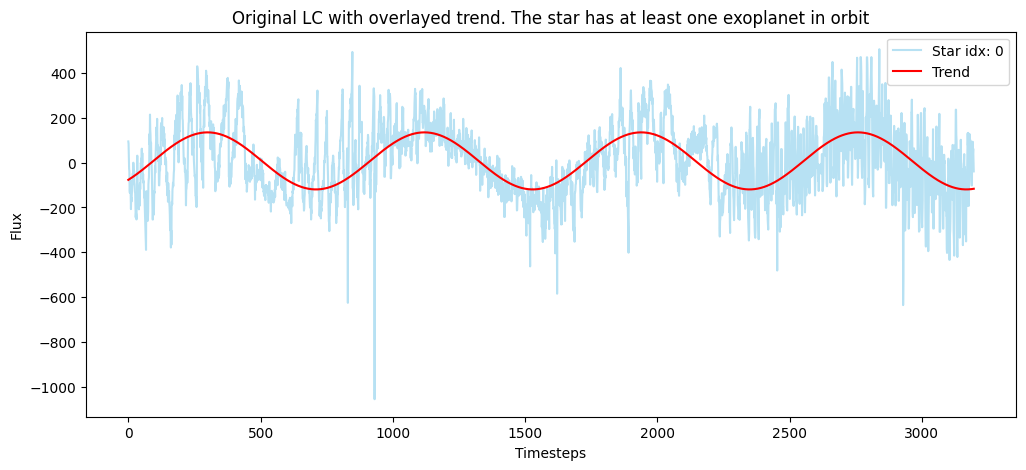

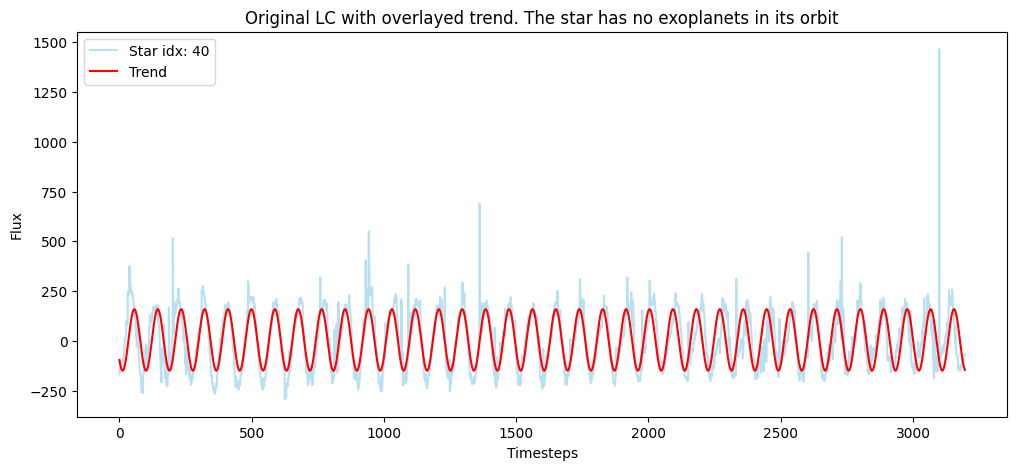

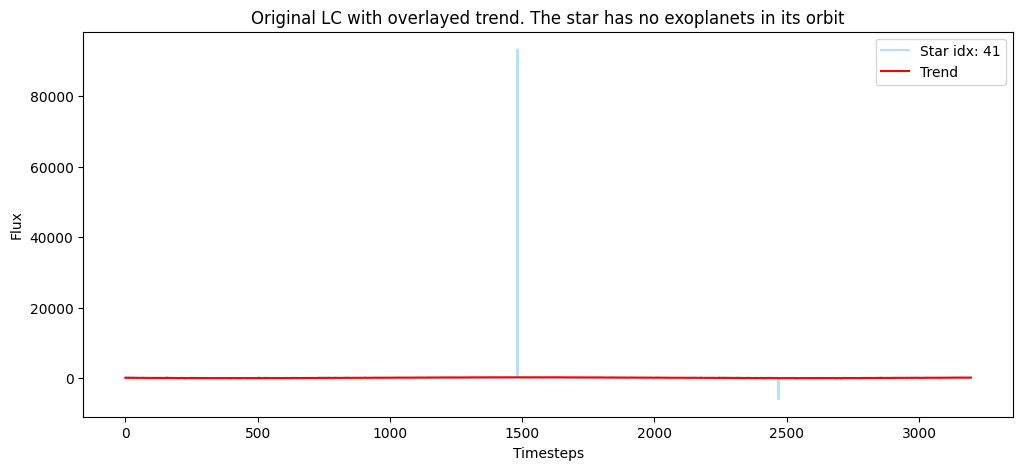

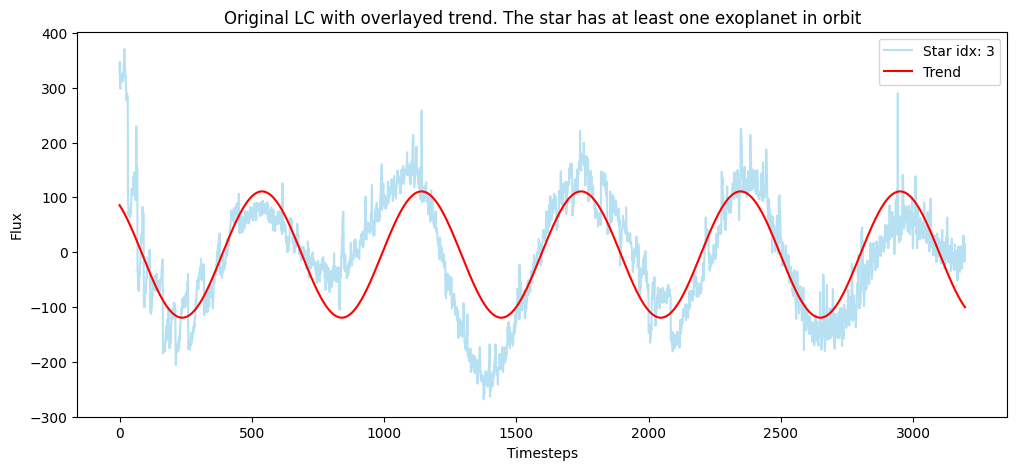

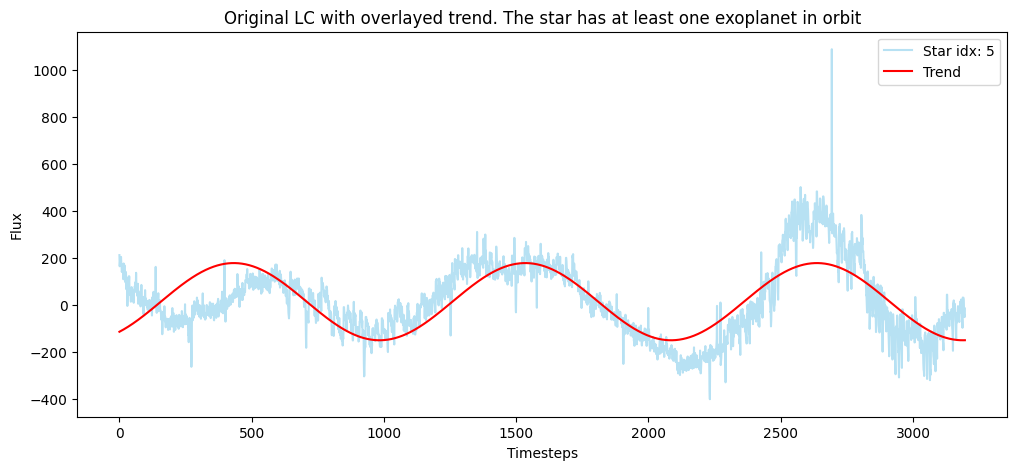

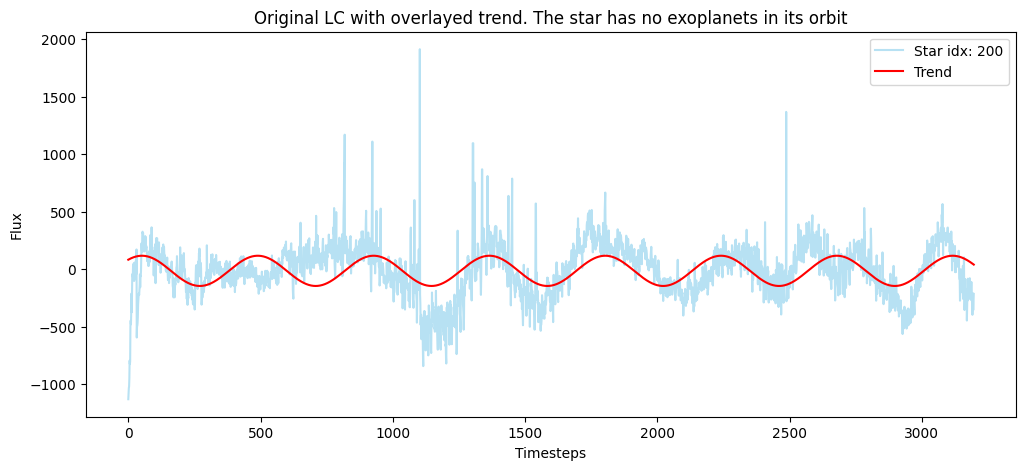

In [19]:
# lets have a look at some stars
for i in [0, 40, 41, 3, 5, 200]:
    wave_trend(df, i)

In [20]:
# so star 42 was weird
df.iloc[41]

LABEL          1.00
FLUX.1       207.74
FLUX.2       223.60
FLUX.3       246.15
FLUX.4       224.06
              ...  
FLUX.3193   -126.58
FLUX.3194     84.05
FLUX.3195     63.81
FLUX.3196    108.36
FLUX.3197     78.10
Name: 41, Length: 3198, dtype: float64

It appears that idx: 41 has some extreme flux measurements, what caused this is currently of no concern, but this is another thing to keep in mind though. 

- Do events such as this mess with potential features?
- If so, what do we do about them?
- Do we make a quality cut within the event, or do we ignore it entirely?

Small studies can be carried out when we cross these bridges.

In [21]:
# split the df into two new dataframes, cutting based on label
df_2 = df[df["LABEL"] == 2].copy()
df_1 = df[df["LABEL"] == 1].copy()

In [22]:
def trend_rmse(flux): # can apply this functon to every star when iterating through each row of the df
    # don't need to assert this is a numpy array right now, it already will be since this is pretty much a single use

    # repeat logic from above
    time = np.arange(len(flux))

    frequency, power = LombScargle(time, flux).autopower()
    best_period = 1 / frequency[np.argmax(power)]

    # fit the period to a sine wave
    def sine(t, A, phi, C):
        return A * np.sin((2 * np.pi * t)/best_period + phi) + C

    # initial conditions / guesses for [A, phi, C]
    I = [np.std(flux), 0, np.mean(flux)]

    parameters, _ = curve_fit(sine, time, flux, p0=I)

    trend = sine(time, *parameters)

    return np.sqrt(np.mean((flux - trend) **2))

In [26]:
# for now, lets look at the RMSE of the flux and its trend for both labels, 2/1.
from tqdm import tqdm

rmse_2 = []     # Exoplanets
rmse_1 = []     # No exoplanets

for idx, star in tqdm(df_1.iterrows(), total=len(df_1), desc="Processing df_1"):
    rmse = trend_rmse(star.drop(["LABEL"]).to_numpy())
    rmse_1.append(rmse)

for idx, star in tqdm(df_2.iterrows(), total=len(df_2), desc="Processing df_2"):
    rmse = trend_rmse(star.drop(["LABEL"]).to_numpy())
    rmse_2.append(rmse)
    

Processing df_2: 100%|█████████████████████████████████████████████████████████████████| 37/37 [00:02<00:00, 13.24it/s]


In [ ]:
# create two histograms of each rmse
rmse_2 = np.array(rmse_2)
rmse_1 = np.array(rmse_1)

plt.hist(rmse_2)
plt.title("Exo")
plt.show()

plt.hist(rmse_1)
plt.title("Non-exo")
plt.show()

There seem to be some annoying results that skew our histograms. A few key points:

1. It is important that just because we said that some cases, idx 41 for example, may cause error, we must ensure not to jump on that idea straight away.
2. Leading on from the first point, we will troubleshoot by hand and see if these extreme results are connected by a common fault. If we see a pattern, then we have grounds to act upon these events and perform some form of quality cut.

Before doing this however, there is no harm in just ignoring the extreme results for the time being just to see if the feature has merit. Perhaps we can look at all events inside the 90th, 95th and 99th percentile just to get an idea for how many events we should be ignoring. This will at lease give us an idea that A) the feature is working, B) maybe the number of anomalies is significantly small the quality cut is not a worry.

In [ ]:
# Step 1a: the first 90%

cut_2 = np.percentile(rmse_2, 90)
cut_1 = np.percentile(rmse_1, 90)

# get some dummy arrays for our 90s
rmse_2_90 = rmse_2[rmse_2 < cut_2]
rmse_1_90 = rmse_1[rmse_1 < cut_1]

# plot histograms
plt.hist(rmse_2_90)
plt.title("Exo")
plt.show()

plt.hist(rmse_1_90)
plt.title("Non-exo")
plt.show()

That looks a bit better. As we expected, it appears that the non-exoplanet stars have a lower rmse on average than an exoplanet-hosting star.

In [ ]:
# Step 1b: plot some histograms for the 95th percentile

# our new sections
rmse_2_95 = rmse_2[rmse_2 < np.percentile(rmse_2, 95)]
rmse_1_95 = rmse_1[rmse_1 < np.percentile(rmse_1, 95)]

# plot histograms
plt.hist(rmse_2_95)
plt.title("Exo")
plt.show()

plt.hist(rmse_1_95)
plt.title("Non-exo")
plt.show()

In [ ]:
# Step 1c: 99%

# our new sections
rmse_2_99 = rmse_2[rmse_2 < np.percentile(rmse_2, 99)]
rmse_1_99 = rmse_1[rmse_1 < np.percentile(rmse_1, 99)]

# plot histograms
plt.hist(rmse_2_99)
plt.title("Exo")
plt.show()

plt.hist(rmse_1_99)
plt.title("Non-exo")
plt.show()

So the data fits our expectations even into the 99th percentile. Lets go back and find some events that cause these issues, and see if we can either fix them or justify ignoring them.

In [ ]:
# lets find indices for the events that led to high values (> 20000):

a = [idx for idx, star in df.iterrows() if trend_rmse(star.drop(["LABEL"]).to_numpy()) > 20000]
print(a)

In [ ]:
# => The exo event we saw initially was star 27:

wave_trend(df, 26)

It appears that this was merely the period algorithm incorrectly fitting the curve. By eye, it does look difficult to see a distinct trend, maybe that in itself is a feature of exoplanets? We just have to keep looking.

In [ ]:
# lets have a look at the extreme results (>100000)
a = [idx for idx, star in df.iterrows() if trend_rmse(star.drop(["LABEL"]).to_numpy()) > 100000]
print(a)

In [ ]:
for i in a:
    wave_trend(df, i)

# Observations

These events that give a high rmse have high flux readings

There seem to be two categories of high rmse events from these:
1. The trend algorithm struggles to find a period. Whether or not the algorithm is being fed good enough initial conditions or parameters is now in question
2. A superposed light-curve, similar to the one idx: 4493 we see above, where we have one larger wave that is in superposition with another wave with a vastly slimmer wavelength, and the period algorithm finds the period of the larger one.

In [ ]:
# Lets ignore that challenge for now, and see if the feature is useful for the majority of stars.
# We can finally create the normalised histograms from before.

# Steps:
# 1. We will use the 95th percentile rmse arrays
# 2. Create bin edges between [0, ..., max{rmse_2_95, rmse_1_95}], and can adjust the number of bins later
# 3. Between these bin edges, we find the bin heights for each array and normalise them so they become a frequency density
# 4. Plot the histogram

def plot_normalised_hist(arr_2, arr_1): # where arr_2 is the exoplanet rmse array, and arr_1 is the no-exoplanet rmse array
    # create bin edges
    max_val = max(np.max(arr_2), np.max(arr_1))
    bin_edges = np.linspace(0, max_val, 50)  # 50 bins

    # find the bin heights and normalise them
    hist_2, _ = np.histogram(arr_2, bins=bin_edges, density=True)
    hist_1, _ = np.histogram(arr_1, bins=bin_edges, density=True)

    # the histogram
    plt.figure(figsize=(10, 6))
    plt.plot(bin_edges[:-1], hist_2, label='Exoplanets', color='blue', alpha=0.5)
    plt.plot(bin_edges[:-1], hist_1, label='No Exoplanets', color='red', alpha=0.5)
    plt.title("Normalised RMSE Histograms")
    plt.xlabel("RMSE")
    plt.ylabel("Fraction of Stars (Normalised)")
    plt.legend()
    plt.show()

plot_normalised_hist(rmse_2_95, rmse_1_95)

In [ ]:
# New approach...
# try fourier transforms on the light curves, and then analysing the parameters